In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans



In [2]:
# Load and read the image
flower = cv2.imread('/content/beautiful.jpg')

In [3]:
# Check the type of the 'flower' variable
type(flower)


numpy.ndarray

In [4]:
# Check the shape (dimensions) of the image
flower.shape

(1600, 2560, 3)

In [5]:
# Convert image to float64 and normalize it (values between 0 and 1)
flower = np.array(flower, dtype=np.float64) / 255.0

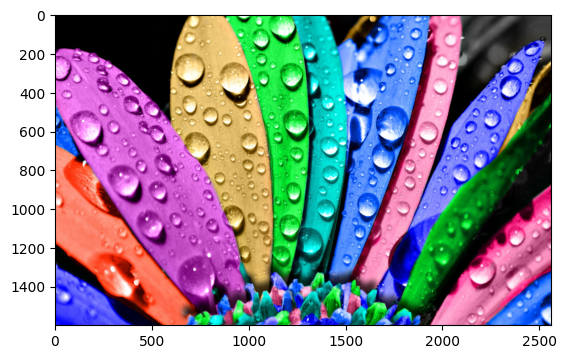

In [6]:
# Display the flower image
plt.imshow(flower)
plt.show()

In [7]:
# Get width, height, and number of channels (dimensions) of the image
w, h, d = original_shape = tuple(flower.shape)

In [8]:
# Confirm that the image is 3-dimensional (RGB image)
assert d == 3

In [9]:
# Reshape the image into a 2-dimensional array
image_array = np.reshape(flower, (w * h, d))

# Shuffle the image array using a fixed random state (seed)
image_sample = shuffle(image_array, random_state=42)

You can play with the number of colors (clusters) to use and see how the image changes

In [10]:
# Specify the number of colors (clusters) you want to detect
n_colors = 2  # specify the number of colors (clusters)


In [11]:
# Initialize and fit KMeans clustering on the image sample
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(image_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

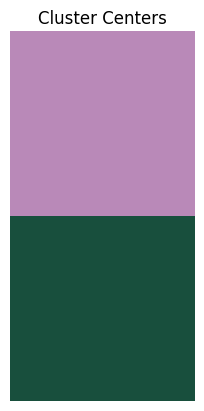

In [12]:
# visualize the cluster centers:
plt.figure()
plt.title('Cluster Centers')
plt.imshow(kmeans.cluster_centers_.reshape(n_colors, 1, d))
plt.axis('off')
plt.show()

In [13]:
# Get color indices for the full image using predict on the original image array
labels = kmeans.predict(image_array)

# Reconstruct the image based on the cluster centers
d = kmeans.cluster_centers_.shape[1]
image = np.zeros((w, h, d))
label_index = 0
for i in range(w):
    for j in range(h):
        image[i][j] = kmeans.cluster_centers_[labels[label_index]]
        label_index += 1

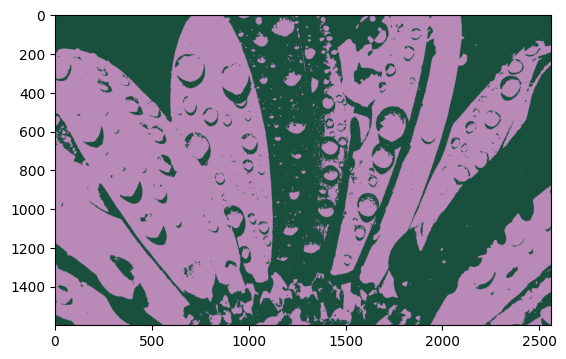

In [14]:
# Display the reconstructed image
plt.imshow(image)
plt.show()





In [15]:
# save the reconstructed image
plt.imsave('/content/clustered_flower.jpg', image)